In [1]:
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(['customerID'], axis=1, inplace=True)

In [4]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
df['OnlineSecurity'].replace({'No internet service': 'No'}, inplace=True)
df['OnlineBackup'].replace({'No internet service': 'No'}, inplace=True)
df['DeviceProtection'].replace({'No internet service': 'No'}, inplace=True)
df['TechSupport'].replace({'No internet service': 'No'}, inplace=True)
df['StreamingMovies'].replace({'No internet service': 'No'}, inplace=True)
df['StreamingTV'].replace({'No internet service': 'No'}, inplace=True)
df['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)

In [6]:
df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df = df[df.TotalCharges!=' ']

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
multi_unique_columns = []
binary_columns = []

for col in df.select_dtypes('object'):
    no_of_unique = df[col].unique().shape[0]
    if no_of_unique >2:
        multi_unique_columns.append(col)
    elif no_of_unique == 2:
        binary_columns.append(col)

In [10]:
multi_unique_columns

['InternetService', 'Contract', 'PaymentMethod']

In [11]:
#list of columns with binary unique values
binary_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [12]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2145,Male,0,No,No,11,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,72.90,818.45,No
86,Female,0,Yes,No,35,Yes,No,DSL,Yes,No,No,No,Yes,No,One year,Yes,Bank transfer (automatic),62.15,2215.45,No
2478,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.55,220.75,No
3156,Female,0,No,No,25,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.05,461.30,No
5380,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.25,144.55,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
le = LabelEncoder()

for col in binary_columns:
    df[col] = le.fit_transform(df[col])

df[binary_columns].sample(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
2893,1,0,0,1,1,1,1,0,0,0,0,0,1
1939,1,0,1,1,0,0,0,0,0,0,0,1,0
1768,0,0,0,1,0,0,0,1,0,0,1,0,0
2061,1,1,1,1,0,0,0,1,0,0,0,0,1
2193,1,0,1,1,0,0,0,0,0,0,0,1,0


In [15]:
dummies = pd.get_dummies(df[multi_unique_columns])
dummies

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,1,0,0,0,0,1
7039,0,1,0,0,1,0,0,1,0,0
7040,1,0,0,1,0,0,0,0,1,0
7041,0,1,0,1,0,0,0,0,0,1


In [16]:
df1 = pd.concat([df, dummies], axis=1)
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3016,0,0,0,0,3,1,0,DSL,0,0,...,1,0,0,1,0,0,0,0,1,0
6911,0,0,1,1,57,1,0,No,0,0,...,0,0,1,0,0,1,1,0,0,0
954,1,0,0,0,22,1,1,Fiber optic,0,0,...,0,1,0,1,0,0,0,0,1,0
4342,0,1,0,0,52,1,1,DSL,1,0,...,1,0,0,0,0,1,1,0,0,0
847,0,0,1,1,12,0,0,DSL,1,0,...,1,0,0,0,1,0,0,1,0,0


In [17]:
df1.drop(['InternetService', 'Contract', 'PaymentMethod'], axis=1, inplace=True)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int32  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int32  
 3   Dependents                               7032 non-null   int32  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int32  
 6   MultipleLines                            7032 non-null   int32  
 7   OnlineSecurity                           7032 non-null   int32  
 8   OnlineBackup                             7032 non-null   int32  
 9   DeviceProtection                         7032 non-null   int32  
 10  TechSupport                              7032 no

In [19]:
df1.shape

(7032, 27)

In [20]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [21]:
x = df1.drop(['Churn'], axis=1)
y = df1['Churn']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4113,1,0,0,0,0.492958,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3820,1,1,1,0,1.000000,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
6370,0,0,0,0,0.619718,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4825,1,0,0,0,0.295775,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1900,1,0,1,1,0.042254,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [23]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(x_train.shape[1],), activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=100)

In [25]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 1s 5ms/step - loss: 0.5720 - accuracy: 0.7697


[0.5720292329788208, 0.7697228193283081]

In [26]:
yp = model.predict(x_test)

44/44 [==============================] - 1s 4ms/step


In [27]:
yp

array([[8.9261073e-01],
       [1.6002850e-01],
       [9.0996200e-01],
       ...,
       [3.3938512e-02],
       [4.6879952e-05],
       [5.1090701e-05]], dtype=float32)

In [28]:
y_pred = []

for i in yp:
    if i < 0.5:
        y_pred.append(0)
    elif i > 0.5:
        y_pred.append(1)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.56      0.59      0.57       372

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [30]:
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

array([[864, 171],
       [153, 219]], dtype=int64)

## Now we are going to handle the imbalance in the data, that is the output by using SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=5)

In [34]:
df1['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [35]:
x_res, y_res = sm.fit_resample(x, y)

In [37]:
x_res.shape[0], y_res.shape[0]

(10326, 10326)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.25, random_state=5)

In [39]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(x_train.shape[1],), activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
242/242 [==============================] - 17s 18ms/step - loss: 0.5398 - accuracy: 0.7257
Epoch 2/100
242/242 [==============================] - 4s 18ms/step - loss: 0.4716 - accuracy: 0.7758
Epoch 3/100
242/242 [==============================] - 4s 17ms/step - loss: 0.4594 - accuracy: 0.7806
Epoch 4/100
242/242 [==============================] - 4s 18ms/step - loss: 0.4518 - accuracy: 0.7863
Epoch 5/100
242/242 [==============================] - 4s 18ms/step - loss: 0.4458 - accuracy: 0.7899
Epoch 6/100
242/242 [==============================] - 4s 18ms/step - loss: 0.4413 - accuracy: 0.7935
Epoch 7/100
242/242 [==============================] - 4s 18ms/step - loss: 0.4350 - accuracy: 0.7998
Epoch 8/100
242/242 [==============================] - 4s 18ms/step - loss: 0.4329 - accuracy: 0.7987
Epoch 9/100
242/242 [==============================] - 4s 18ms/step - loss: 0.4274 - accuracy: 0.8002
Epoch 10/100
242/242 [==============================] - 4s 17ms/step - loss: 0.42

242/242 [==============================] - 4s 18ms/step - loss: 0.3108 - accuracy: 0.8667
Epoch 81/100
242/242 [==============================] - 4s 18ms/step - loss: 0.3082 - accuracy: 0.8687
Epoch 82/100
242/242 [==============================] - 4s 17ms/step - loss: 0.3109 - accuracy: 0.8669
Epoch 83/100
242/242 [==============================] - 4s 17ms/step - loss: 0.3063 - accuracy: 0.8688
Epoch 84/100
242/242 [==============================] - 4s 17ms/step - loss: 0.3057 - accuracy: 0.8696
Epoch 85/100
242/242 [==============================] - 4s 18ms/step - loss: 0.3069 - accuracy: 0.8678
Epoch 86/100
242/242 [==============================] - 4s 18ms/step - loss: 0.3069 - accuracy: 0.8666
Epoch 87/100
242/242 [==============================] - 5s 19ms/step - loss: 0.3032 - accuracy: 0.8688
Epoch 88/100
242/242 [==============================] - 4s 18ms/step - loss: 0.3092 - accuracy: 0.8645
Epoch 89/100
242/242 [==============================] - 5s 19ms/step - loss: 0.3049 - 

In [40]:
model.evaluate(x_test, y_test)

81/81 [==============================] - 3s 15ms/step - loss: 0.4745 - accuracy: 0.8044


[0.4745272397994995, 0.8044151663780212]

In [41]:
yp = model.predict(x_test)

81/81 [==============================] - 2s 13ms/step


In [43]:
y_pred = []

for i in yp:
    if i < 0.5:
        y_pred.append(0)
    elif i > 0.5:
        y_pred.append(1)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1278
           1       0.80      0.81      0.81      1304

    accuracy                           0.80      2582
   macro avg       0.80      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582



Text(95.72222222222221, 0.5, 'Truth')

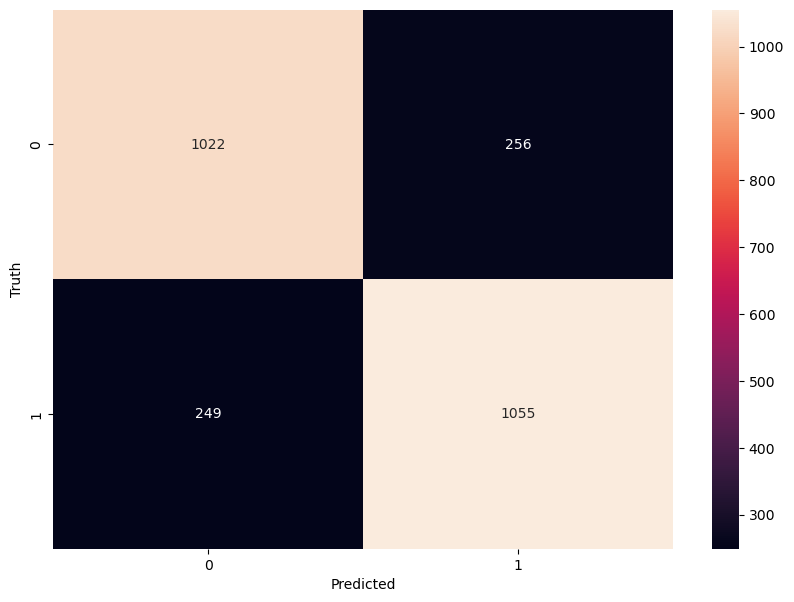

In [45]:
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')